In [2]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import sys

sys.path.append("..")

In [3]:
# importing the dataset
data = pd.read_csv("data.csv", encoding = "ISO-8859--1")
data['TransactionAmount'] = data['UnitPrice'] * data['Quantity']

In [4]:
# input country
countries = data.Country.unique()
print(countries)
country_input = input('Enter country: ')
by_country = data.groupby(data.Country).get_group(country_input).drop('Country', axis=1)
by_country

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TransactionAmount
119191,546533,20886,BOX OF 9 PEBBLE CANDLES,12,3/14/2011 13:53,1.95,15388.0,23.40
119192,546533,79030D,"TUMBLER, BAROQUE",6,3/14/2011 13:53,1.65,15388.0,9.90
119193,546533,21132,SILVER STANDING GNOME,4,3/14/2011 13:53,4.25,15388.0,17.00
119194,546533,84879,ASSORTED COLOUR BIRD ORNAMENT,8,3/14/2011 13:53,1.69,15388.0,13.52
119195,546533,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,16,3/14/2011 13:53,0.65,15388.0,10.40
...,...,...,...,...,...,...,...,...
312960,564428,21993,FLORAL FOLK STATIONERY SET,12,8/25/2011 11:27,1.25,17844.0,15.00
312961,564428,23295,SET OF 12 MINI LOAF BAKING CASES,8,8/25/2011 11:27,0.83,17844.0,6.64
312962,564428,23293,SET OF 12 FAIRY CAKE BAKING CASES,16,8/25/2011 11:27,0.83,17844.0,13.28
312963,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,8/25/2011 11:27,1.25,17844.0,10.00


In [175]:
# number of sales by country
num_of_sales = {}
for i in countries:
    num_of_sales[i] = len(data.groupby(data.Country).get_group(i).index)
num_of_sales

{'United Kingdom': 495478,
 'France': 8557,
 'Australia': 1259,
 'Netherlands': 2371,
 'Germany': 9495,
 'Norway': 1086,
 'EIRE': 8196,
 'Switzerland': 2002,
 'Spain': 2533,
 'Poland': 341,
 'Portugal': 1519,
 'Italy': 803,
 'Belgium': 2069,
 'Lithuania': 35,
 'Japan': 358,
 'Iceland': 182,
 'Channel Islands': 758,
 'Denmark': 389,
 'Cyprus': 622,
 'Sweden': 462,
 'Austria': 401,
 'Israel': 297,
 'Finland': 695,
 'Bahrain': 19,
 'Greece': 146,
 'Hong Kong': 288,
 'Singapore': 229,
 'Lebanon': 45,
 'United Arab Emirates': 68,
 'Saudi Arabia': 10,
 'Czech Republic': 30,
 'Canada': 151,
 'Unspecified': 446,
 'Brazil': 32,
 'USA': 291,
 'European Community': 61,
 'Malta': 127,
 'RSA': 58}

In [167]:
# finding total revenue by country
total_revenue = {}
for j in countries:
    total_revenue[j] = sum(data.groupby(data.Country).get_group(j)['TransactionAmount'])
total_revenue

{'United Kingdom': 8187806.364001113,
 'France': 197403.90000000002,
 'Australia': 137077.26999999973,
 'Netherlands': 284661.54000000015,
 'Germany': 221698.20999999862,
 'Norway': 35163.46000000004,
 'EIRE': 263276.81999999826,
 'Switzerland': 56385.35000000009,
 'Spain': 54774.57999999997,
 'Poland': 7213.139999999997,
 'Portugal': 29367.019999999993,
 'Italy': 16890.510000000002,
 'Belgium': 40910.95999999998,
 'Lithuania': 1661.06,
 'Japan': 35340.62,
 'Iceland': 4309.999999999997,
 'Channel Islands': 20086.289999999957,
 'Denmark': 18768.140000000003,
 'Cyprus': 12946.289999999999,
 'Sweden': 36595.91,
 'Austria': 10154.319999999996,
 'Israel': 7907.819999999995,
 'Finland': 22326.73999999997,
 'Bahrain': 548.4,
 'Greece': 4710.5199999999995,
 'Hong Kong': 10117.040000000003,
 'Singapore': 9120.39,
 'Lebanon': 1693.8800000000003,
 'United Arab Emirates': 1902.2800000000007,
 'Saudi Arabia': 131.17,
 'Czech Republic': 707.72,
 'Canada': 3666.380000000001,
 'Unspecified': 4749.7899

In [178]:
# finding country with highest revenue
def key_with_max_val(d):
     v = list(d.values())
     k = list(d.keys())
     return k[v.index(max(v))] +': ' + str(d[k[v.index(max(v))]])
print(key_with_max_val(total_revenue))

United Kingdom: 8187806.364001113


In [169]:
# percentage of revenue by country
sales_percent = {}
for k in countries:
    total_amount = sum(data['TransactionAmount'])
    country_amount = sum(data.groupby(data.Country).get_group(k)['TransactionAmount'])
    sales_percent[k] = (float(country_amount) / float(total_amount)) * 100
sales_percent

{'United Kingdom': 83.99690286860519,
 'France': 2.0251231498446316,
 'Australia': 1.4062455341282643,
 'Netherlands': 2.9202800680453826,
 'Germany': 2.274353127522373,
 'Norway': 0.3607341945860026,
 'EIRE': 2.700898933605033,
 'Switzerland': 0.5784448919048316,
 'Spain': 0.5619203571004255,
 'Poland': 0.07399801522193988,
 'Portugal': 0.301269792764734,
 'Italy': 0.1732760234913406,
 'Belgium': 0.4196965317218539,
 'Lithuania': 0.017040448842606068,
 'Japan': 0.36255164002262463,
 'Iceland': 0.044215341114488396,
 'Channel Islands': 0.2060608269314468,
 'Denmark': 0.19253821628410092,
 'Cyprus': 0.13281313886707433,
 'Sweden': 0.37542938376916896,
 'Austria': 0.10417093331454105,
 'Israel': 0.08112458440185003,
 'Finland': 0.22904511022610025,
 'Bahrain': 0.0056259148647762065,
 'Greece': 0.04832418761638515,
 'Hong Kong': 0.10378848600207057,
 'Singapore': 0.09356407307358912,
 'Lebanon': 0.017377141996986003,
 'United Arab Emirates': 0.01951507171583969,
 'Saudi Arabia': 0.0013456

In [170]:
# total quantity sold
quantity_sold = {}
for l in countries:
    quantity_sold[l] = sum(data.groupby(data.Country).get_group(l)['Quantity'])
quantity_sold

{'United Kingdom': 4263829,
 'France': 110480,
 'Australia': 83653,
 'Netherlands': 200128,
 'Germany': 117448,
 'Norway': 19247,
 'EIRE': 142637,
 'Switzerland': 30325,
 'Spain': 26824,
 'Poland': 3653,
 'Portugal': 16180,
 'Italy': 7999,
 'Belgium': 23152,
 'Lithuania': 652,
 'Japan': 25218,
 'Iceland': 2458,
 'Channel Islands': 9479,
 'Denmark': 8188,
 'Cyprus': 6317,
 'Sweden': 35637,
 'Austria': 4827,
 'Israel': 4353,
 'Finland': 10666,
 'Bahrain': 260,
 'Greece': 1556,
 'Hong Kong': 4769,
 'Singapore': 5234,
 'Lebanon': 386,
 'United Arab Emirates': 982,
 'Saudi Arabia': 75,
 'Czech Republic': 592,
 'Canada': 2763,
 'Unspecified': 3300,
 'Brazil': 356,
 'USA': 1034,
 'European Community': 497,
 'Malta': 944,
 'RSA': 352}

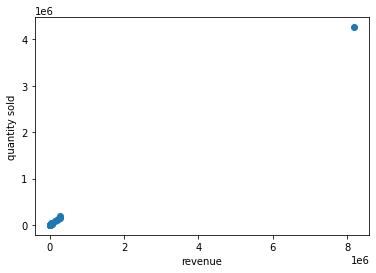

In [171]:
# plotting total revenue and quantity sold on scatter plot
def plot(x, y):
    plt.scatter(x, y)
    plt.xlabel('revenue')
    plt.ylabel('quantity sold')
plot(total_revenue.values(), quantity_sold.values())

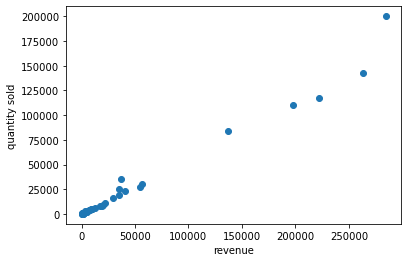

In [174]:
# removing united kingdom because it is an outlier
def remove_key(d, key):
    r = dict(d)
    del r[key]
    return r

x = remove_key(total_revenue, 'United Kingdom').values()
y = list(map(float, remove_key(quantity_sold, 'United Kingdom').values()))

plot(x, y)